# **Marketing Analytics: Predicting Customer Churn in Python**

Churn is when a customer stops doing business or ends a relationship with a company. It’s a common problem across a variety of industries, from telecommunications to cable TV to SaaS, and a company that can predict churn can take proactive action to retain valuable customers and get ahead of the competition. This analysis will explore and visualize the data, prepare it for modeling, make predictions using machine learning, and communicate important, actionable insights to stakeholders.

In [531]:
# importing libraries

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [533]:
# reading csv

In [534]:
telco=pd.read_csv("churn.csv")

In [535]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [536]:
# i'm dropping columns phone and Areacode,state because i wont be using it
telco=telco.drop(columns=['Area_Code','Phone'])

In [537]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


In [538]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [539]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
dtype: int64

In [540]:
telco.duplicated().sum()

0

In [541]:
# columns are validated, no cleaning required

In [542]:
telco.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

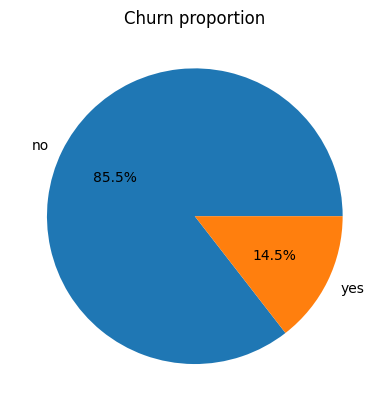

In [543]:
churn_prop= telco.groupby('Churn').size().reset_index(name="count")
plt.pie(churn_prop['count'],labels=churn_prop.Churn,autopct='%1.1f%%')
plt.title('Churn proportion')
plt.show()    

In [544]:
# most of the customers did not churn

In [545]:
telco.groupby('Churn')[['CustServ_Calls','Vmail_Message']].mean().reset_index()

,Churn,CustServ_Calls,Vmail_Message
0,no,1.449825,8.604561
1,yes,2.229814,5.115942


In [546]:
telco.groupby('Churn')[['CustServ_Calls','Vmail_Message']].std().reset_index()

,Churn,CustServ_Calls,Vmail_Message
0,no,1.163883,13.913125
1,yes,1.853275,11.860138


In [547]:
# Churners make more customer service calls than non-churners.

In [548]:
# calculating churn rate
churn_rate = telco.groupby('State')['Churn'].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False).reset_index()
churn_rate


,State,yes
0,NJ,0.264706
1,CA,0.264706
2,TX,0.250000
3,MD,0.242857
4,SC,0.233333
5,MI,0.219178
6,MS,0.215385
7,NV,0.212121
8,WA,0.212121
9,ME,0.209677


In [549]:
# New jersey and california has the highest churn rate


# DATA VISUALIZATION USING SEABORN

In [550]:
# importing seaborn

In [551]:
import seaborn as sns

In [552]:
# lets check distribution

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_9456\1698074751.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Day_Mins'])


<AxesSubplot: xlabel='Day_Mins', ylabel='Density'>

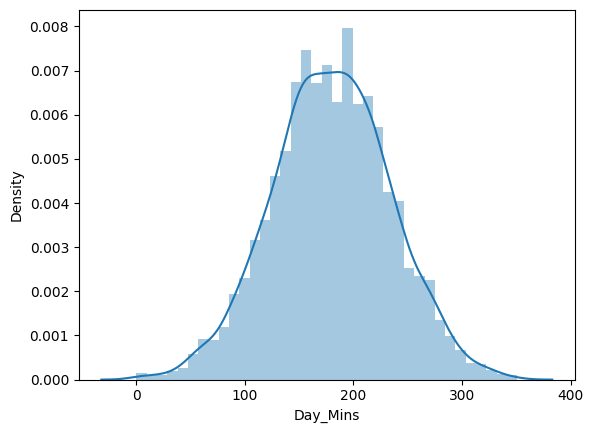

In [553]:
sns.distplot(telco['Day_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_9456\1085112728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Eve_Mins'])


<AxesSubplot: xlabel='Eve_Mins', ylabel='Density'>

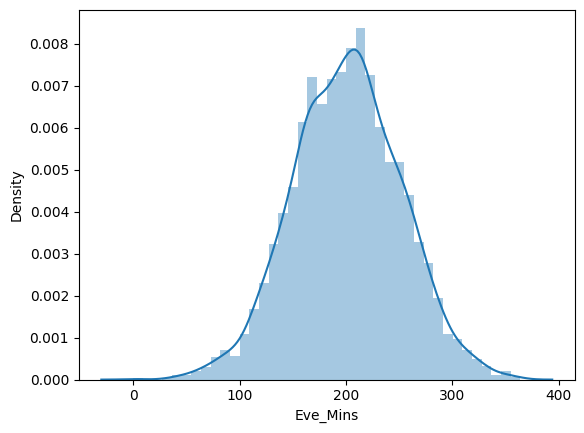

In [554]:
sns.distplot(telco['Eve_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_9456\1117512033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Night_Mins'])


<AxesSubplot: xlabel='Night_Mins', ylabel='Density'>

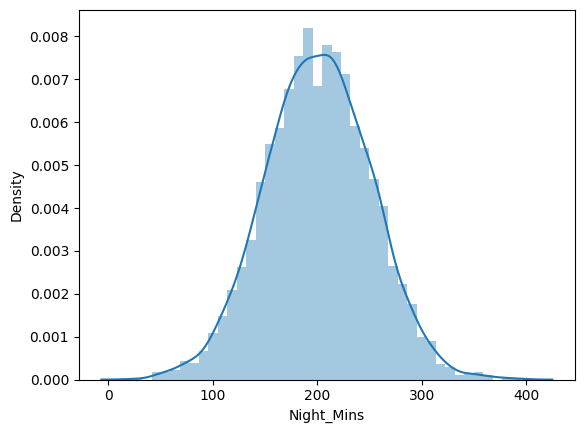

In [555]:
sns.distplot(telco['Night_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_9456\3673057908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Intl_Mins'])


<AxesSubplot: xlabel='Intl_Mins', ylabel='Density'>

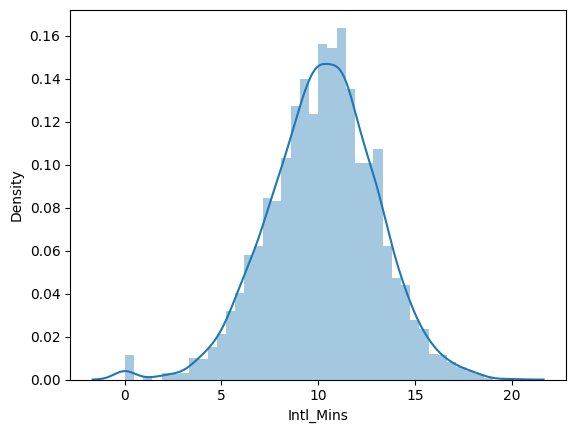

In [556]:
sns.distplot(telco['Intl_Mins'])

In [557]:
# the values are normally distributed

## Churn and plans - box plot

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

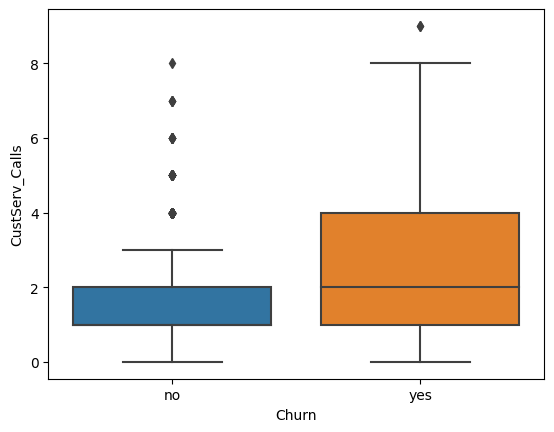

In [558]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco)

In [559]:
# many outliers are present in customers who stood

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

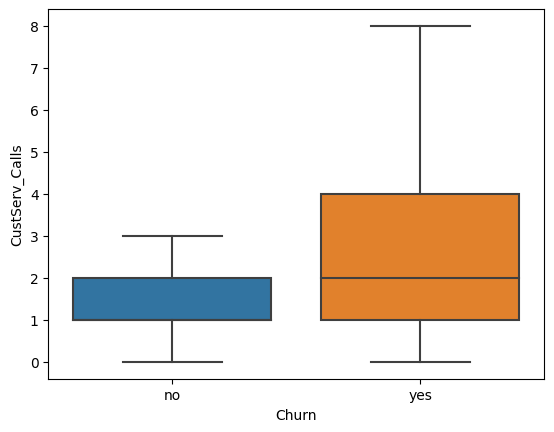

In [560]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco,
            sym='')

In [561]:
# There is a very noticeable difference here between churners and non-churners!

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

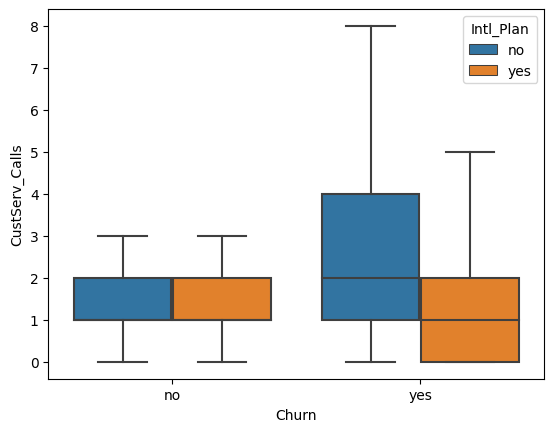

In [562]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco,
            sym='',
            hue='Intl_Plan')

In [563]:
# Churners with no international plan tends to call customer service more times 

# preprocessing for model

### encoding binary features

In [564]:
telco.shape

(3333, 19)

In [565]:
# encoding is required for the machine learning process

In [566]:
telco['Intl_Plan']= telco['Intl_Plan'].replace({ 'yes':1, 'no':0})
telco['Churn']= telco['Churn'].replace({ 'yes':1, 'no':0})
telco['Vmail_Plan']=telco['Vmail_Plan'].replace({'yes':1,'no':0})

In [567]:
telco['Intl_Plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: Intl_Plan, Length: 3333, dtype: int64

 # Feature scaling 

In [568]:
import sklearn

In [569]:
from sklearn.preprocessing import StandardScaler

#### Create a dataframe that uses these two columns

In [570]:

telco[['Intl_Calls', 'Night_Mins']]


,Intl_Calls,Night_Mins
0,3,244.7
1,3,254.4
2,5,162.6
3,7,196.9
4,3,186.9
...,...,...
3328,6,279.1
3329,4,191.3
3330,6,191.9
3331,10,139.2


In [571]:
telco_scale=StandardScaler().fit_transform(telco[['Intl_Calls', 'Night_Mins']])


## Feature engineering

In [606]:
telco['Avg_Night_Calls'] = telco.Night_Calls/telco.Night_Mins 

In [607]:
telco['Avg_Day_Calls'] = telco.Day_Calls/telco.Day_Mins

In [608]:
telco['Avg_Eve_Calls'] = telco.Eve_Calls/telco.Eve_Mins

In [ ]:
telco.drop('State',axis=1,inplace=True)

In [576]:
data= telco.copy()


In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   int64  
 1   Vmail_Message    3333 non-null   int64  
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   int64  
 7   Churn            3333 non-null   int64  
 8   Intl_Plan        3333 non-null   int64  
 9   Vmail_Plan       3333 non-null   int64  
 10  Day_Calls        3333 non-null   int64  
 11  Day_Charge       3333 non-null   float64
 12  Eve_Calls        3333 non-null   int64  
 13  Eve_Charge       3333 non-null   float64
 14  Night_Calls      3333 non-null   int64  
 15  Night_Charge     3333 non-null   float64
 16  Intl_Calls       3333 non-null   int64  
 17  Intl_Charge   

# Churn prediction

### Logistic regression


In [578]:
from sklearn.model_selection import train_test_split

In [579]:
X= data.drop('Churn',axis=1)
y= data.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ) 


# scores

In [584]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.949


In [585]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print(cr)


[[850   9]
 [ 42  99]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       859
           1       0.92      0.70      0.80       141

    accuracy                           0.95      1000
   macro avg       0.93      0.85      0.88      1000
weighted avg       0.95      0.95      0.95      1000



In [586]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [587]:
recall_score(y_test, y_pred)


0.7021276595744681

In [588]:
precision_score(y_test, y_pred)

0.9166666666666666

# roc_curve

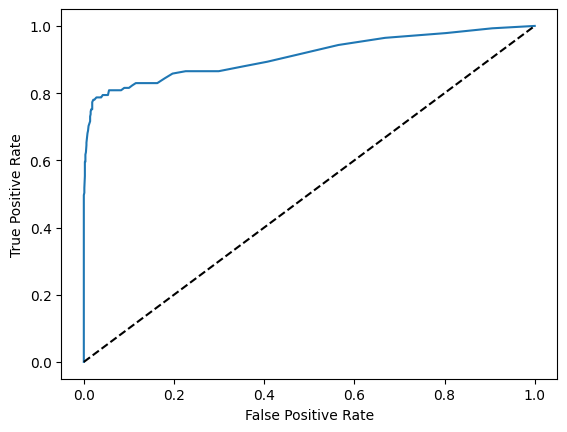

In [589]:
    # Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [590]:

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.911384671273706


In [591]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7951807228915662

In [593]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past b

{'max_features': 'sqrt'}


In [594]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)
# Print best parameters
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6}


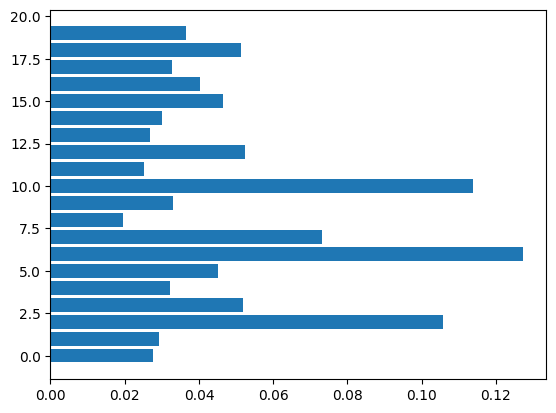

In [595]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

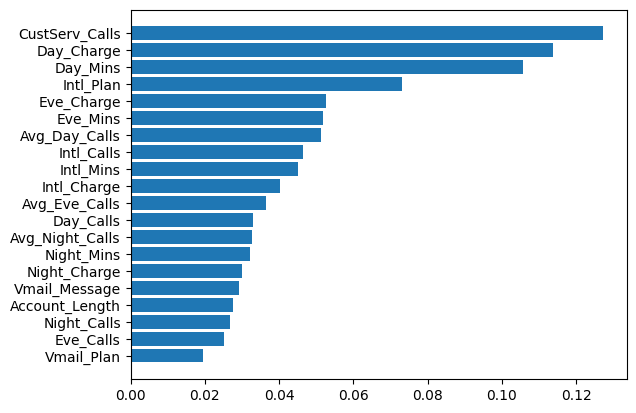

In [596]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [597]:
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls,Avg_Day_Calls,Avg_Eve_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,0.371884,0.414938,0.501520
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,0.404874,0.761139,0.526854
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,0.639606,0.468365,0.907591
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,0.452006,0.237141,1.421648
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,0.647405,0.677864,0.822657


In [598]:
data['Total_charge']= data['Intl_Charge'] + data['Eve_Charge'] + data['Night_Charge'] + data['Day_Charge']
data['Total_mins']= data['Intl_Mins'] + data['Eve_Mins'] + data['Night_Mins'] + data['Day_Mins']
data['Total_Calls']= data['Intl_Calls'] + data['Eve_Calls'] + data['Night_Calls'] + data['Day_Calls']
data['Min_Calls']= data['Total_Calls']/data['Total_mins']
data['Cost_call']=data['Total_charge']/data['Total_mins']

In [601]:
X= data.drop('Churn',axis=1)
y= data.Churn

In [602]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test,y_test))

0.972972972972973


In [603]:
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred)

0.898876404494382

In [604]:
confusion_matrix(y_test, y_pred)

array([[852,   0],
       [ 27, 120]], dtype=int64)

In [605]:

cr=classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       852
           1       1.00      0.82      0.90       147

    accuracy                           0.97       999
   macro avg       0.98      0.91      0.94       999
weighted avg       0.97      0.97      0.97       999



Precision: The precision for the positive class (customer churn = 1) is 0.99. This means that out of all the samples that the model predicted as positive, 99% of them were actually positive (i.e., true positives), and only 1% were false positives.

Recall: The recall for the positive class is 0.79. This means that out of all the actual positive samples, the model correctly identified 79% of them (i.e., true positives), while 21% were false negatives (i.e., actual positive samples that the model predicted as negative).

F1-score: The F1-score is a weighted harmonic mean of precision and recall, with equal weightage given to both metrics. The F1-score for the positive class is 0.88, which indicates a good balance between precision and recall.
this is great score overall